In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./kaggle/input/.DS_Store
./kaggle/input/rtatman/.DS_Store
./kaggle/input/rtatman/deceptive-opinion-spam-corpus/.DS_Store
./kaggle/input/rtatman/deceptive-opinion-spam-corpus/deceptive-opinion.csv


In [2]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [8]:
df = pd.read_csv('./kaggle/input/rtatman/deceptive-opinion-spam-corpus/deceptive-opinion.csv')

In [9]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [10]:
df = df.drop(["hotel", "polarity","source"], axis=1)

In [11]:
df = df.sample(frac=1)

In [12]:
df.head()

,deceptive,text
1545,deceptive,I recently stayed at this hotel not to long ag...
17,truthful,The Conrad Hotel is a beautiful hotel. Our roo...
911,truthful,"Location is excellent, but don't valet your ca..."
76,truthful,My husband and I had a wonderful stay at the O...
1361,deceptive,My daughter's broken heart My daughter loves A...


In [13]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['deceptive']= label_encoder.fit_transform(df['deceptive']) 

df['deceptive'].unique() 

array([0, 1])

In [14]:
df.head()

,deceptive,text
1545,0,I recently stayed at this hotel not to long ag...
17,1,The Conrad Hotel is a beautiful hotel. Our roo...
911,1,"Location is excellent, but don't valet your ca..."
76,1,My husband and I had a wonderful stay at the O...
1361,0,My daughter's broken heart My daughter loves A...


In [15]:
#dataset description #truthful=1 deceptive=0
df.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  I recently stayed at this hotel not to long ag...    1
1           800    796  The Omni was chosen for it's location whichwor...    2

In [16]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [17]:
# Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [18]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [19]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))

In [20]:
df['text'] = df['text'].map(lambda a: clean_char(a))

In [21]:
df['text'] = df['text'].map(lambda a: clean_text(a))

In [22]:
df['text']

1545    recent stay hotel long ago sure look nice real...
17      conrad hotel beauti hotel room perfect beauti ...
911     locat excel valet car day bed soft pillow flat...
76      husband wonder stay omni chicago hotel contact...
1361    daughter broken heart daughter love american g...
                              ...                        
98      stay sheraton navi pier first weekend novemb p...
378     love hotel reason downtown chicago older hotel...
84      locat hotel excel besid subway bus stop free t...
1537    husband stay hotel allegro chicago past summer...
1280    stay millennium knickerbock hotel chicago one ...
Name: text, Length: 1600, dtype: object

In [23]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1545 to 1280
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int64 
 1   text       1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [25]:
x = df['text']
y = df['deceptive']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [28]:
X_train, X_test, y_train, y_test

(1566    pictur websit sure deceiv real life palmer hou...
 580     upon arriv ambassador east hotel chicago immed...
 1589    hotel expect would websit pictur portray hotel...
 201     stay hotel sever occas never fail anyth deligh...
 187     stay hard rock one night intens day thanksgiv ...
                               ...                        
 883     park servic great front desk terribl huge prob...
 1261    stay omni chicago hotel recent noth disappoint...
 1364    husband recent spent night ambassador east hot...
 760     review first class hotel intercontinent chicag...
 618     hard rock hotel must visit matter citi hard ro...
 Name: text, Length: 1200, dtype: object,
 1075    non smoke room smell bad stale cigarett smoke ...
 1489    stay schicago hilton day night confer say norm...
 932     suit knickerbock quit nice behavior attitud st...
 1161    locat clark lake train stop great thing great ...
 179     wife stay two night talbott end februari littl...
              

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [30]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [32]:
predictions = naive_bayes.predict(testing_data)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.865
Precision score:  0.9
Recall score:  0.8411214953271028
F1 score:  0.8695652173913043


In [34]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [35]:
svc_predictions = svc.predict(testing_data)

In [36]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.8625
Precision score:  0.8916256157635468
Recall score:  0.8457943925233645
F1 score:  0.86810551558753


In [37]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
knn_predictions = knn.predict(testing_data)

In [39]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.5625
Precision score:  0.9333333333333333
Recall score:  0.19626168224299065
F1 score:  0.32432432432432434


In [40]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)

GaussianNB()

In [41]:
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

In [42]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.6725
Precision score:  0.7243243243243244
Recall score:  0.6261682242990654
F1 score:  0.6716791979949874


In [43]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(max_depth=2)

In [44]:
dtree_predictions = dtree_model.predict(testing_data) 

In [45]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.69
Precision score:  0.7777777777777778
Recall score:  0.5887850467289719
F1 score:  0.6702127659574468


In [46]:
from sklearn.linear_model import SGDClassifier

In [47]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [48]:
sgdpredicted = sgd_clf.predict(testing_data)

In [49]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.8575
Precision score:  0.8617511520737328
Recall score:  0.8738317757009346
F1 score:  0.8677494199535963


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [52]:
lrpredicted = lr.predict(testing_data)

In [53]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.8625
Precision score:  0.8878048780487805
Recall score:  0.8504672897196262
F1 score:  0.8687350835322196


In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [55]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)

Multinomial Naive Bayes: 0.865
Gausian Naive Bayes: 0.6725
Decision tree: 0.69
Support Vector Classifier: 0.8625
K-Nearest Neighbour: 0.5625
Stochastic Gradient Descent: 0.8575
LogisticRegression: 0.8625


In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(training_data)
y_kmeans = kmeans.predict(training_data)

/Users/sylviaz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
stemmed_dataset = []
for i in range(0,1600):
    stemmed_array = df['text'][i].split()
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed = ' '.join(stemmed)
    stemmed_dataset.append(stemmed)
print(stemmed[0:1600])

former chicagoan appal amalfi hotel chicago first expect luxuri hospit neither receiv experi design suppo like person concierg experi terribl felt like tri pressur stay day want understand say time talk fast final got room disappoint qualiti furnitur room cleanli ask maid come give clean towel towel bathroom damp top bed messili done could done better job bed home angri point pay lot money everi night stay amalfi expect greet wet towel need use download import document internet surpri slow even basic hotel motel could offer better mayb even faster internet access final check amalfi made sure suppo person concierg knew problem room hotel glad see amalfi get smaller mirror drove away


AUC: 0.669


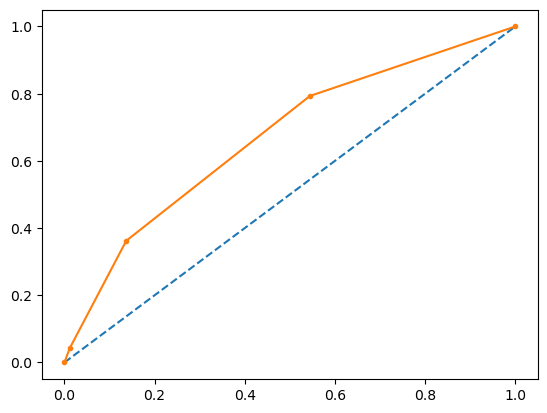

In [60]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.943


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


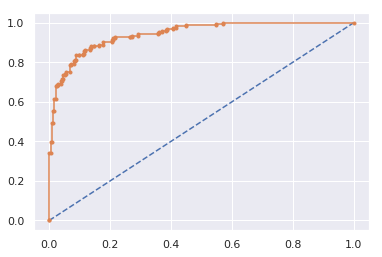

In [258]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = LogisticRegression()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.688


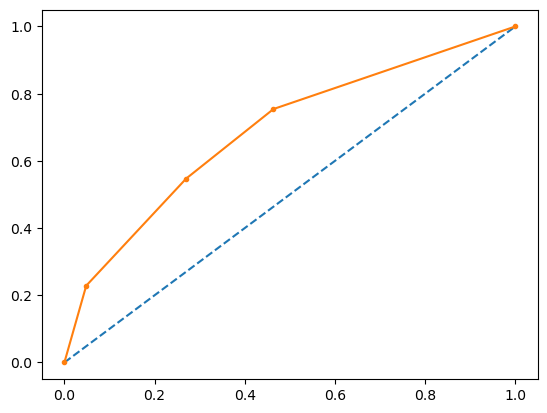

In [61]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = DecisionTreeClassifier(max_depth = 2)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.684


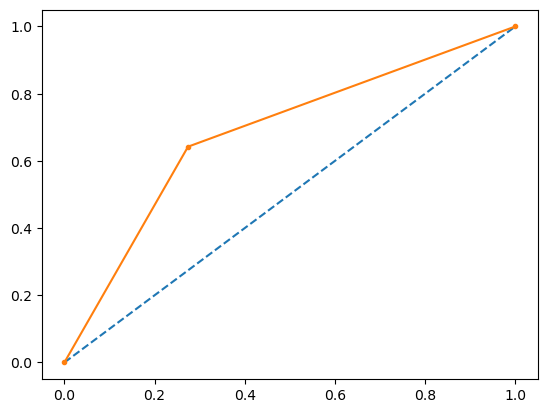

In [62]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = GaussianNB()
training_data1 = training_data.toarray()
model.fit(training_data1, trainy)
# predict probabilities
testing_data1 = testing_data.toarray()
probs = model.predict_proba(testing_data1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.959


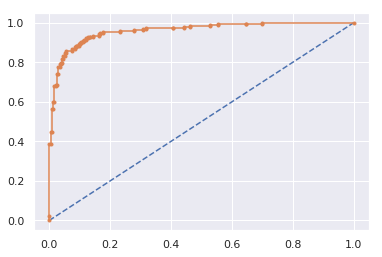

In [262]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = MultinomialNB()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [63]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = SVC()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AttributeError: predict_proba is not available when  probability=False